# Plot 2D funcs and evoluation

In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, Matern
from core import *

In [3]:
plt.rcParams.update({'font.size': 16})
%load_ext autoreload
%autoreload 2

# Examplary funcs

In [4]:
# Generate function_true
f_true_list = np.load('true_funcs/2d_RBF_411.npy', 
                       allow_pickle=True)
n_dim, num_grids_mc = 2, 201
domain = [[-5, 5] for i in range(n_dim)]
bw = 0.1
grids = [np.linspace(domain[i][0],  domain[i][1],  num_grids_mc) 
            for i in range(n_dim)]
meshes = np.meshgrid(*grids)
grids = np.concatenate([mesh.reshape(-1, 1) for mesh in meshes], axis=1)

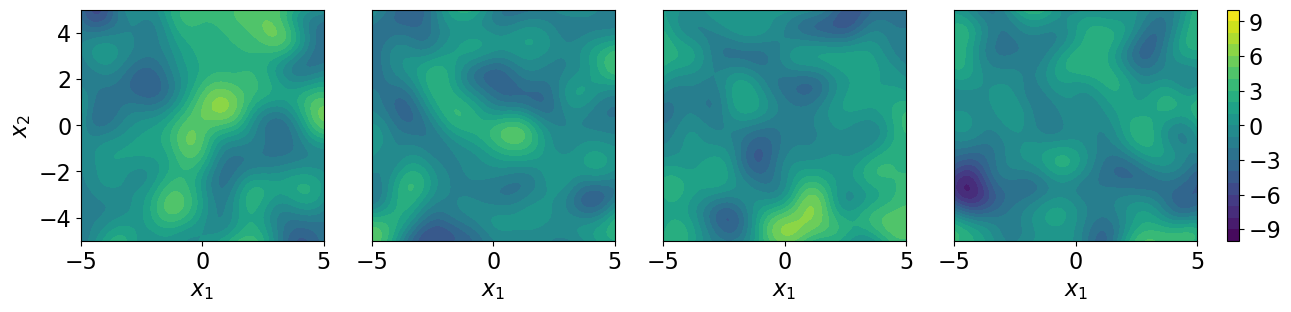

In [6]:
# plot 4 function countours

figure, axes = plt.subplots(1, 4, figsize=(18, 3))
x = np.linspace(-5, 5, num_grids_mc)
y = np.linspace(-5, 5, num_grids_mc)
xv, yv = np.meshgrid(x, y)
levels = np.arange(-10, 10.1, 1)

for i in range(4):
    if i == 3:
        cs = axes[i].contourf(xv, yv,
                 f_true_list[i](grids).reshape(yv.shape), levels=levels)
    else:
        axes[i].contourf(xv, yv,
                 f_true_list[i](grids).reshape(yv.shape), levels=levels)
    axes[i].set_xlabel('$x_1$')
    if i == 0:
        axes[i].set_ylabel('$x_2$')
    else:
        axes[i].set_yticks([])
# make the colorbar close to the last plot
figure.colorbar(cs, ax=axes, anchor=(-0.2, 0.5))
plt.savefig('plots/true_funcs_RBF.pdf', bbox_inches='tight')
plt.show()

# Plot evolution 

In [6]:
n_dim=2
kernel_type='RBF'

tau_n, l_n = 4, np.array([1, 1])
w_n, sigma_n = np.array([0, 0]), np.array([[1, 0], [0, 1]])
domain = [[-5, 5], [-5, 5]]
inputs = GaussianInputs(w_n, sigma_n, domain)
kernel = C(tau_n, 'fixed') * RBF(l_n, 'fixed')

filename = ('true_funcs/' + str(n_dim) + 'd_' 
            + kernel_type + '_' 
            + str(tau_n) + ''.join([str(l).replace('.','') for l in l_n])
            + '.npy')

f_true_list = np.load(filename, allow_pickle=True)
sgp = GaussianProcessRegressor(kernel=kernel, random_state=0)

res = np.load('results/t10/2d_RBF_411_Gaussian.npy',
              allow_pickle=True)

[-4.75 -3.3 ] [-5.   -0.55]


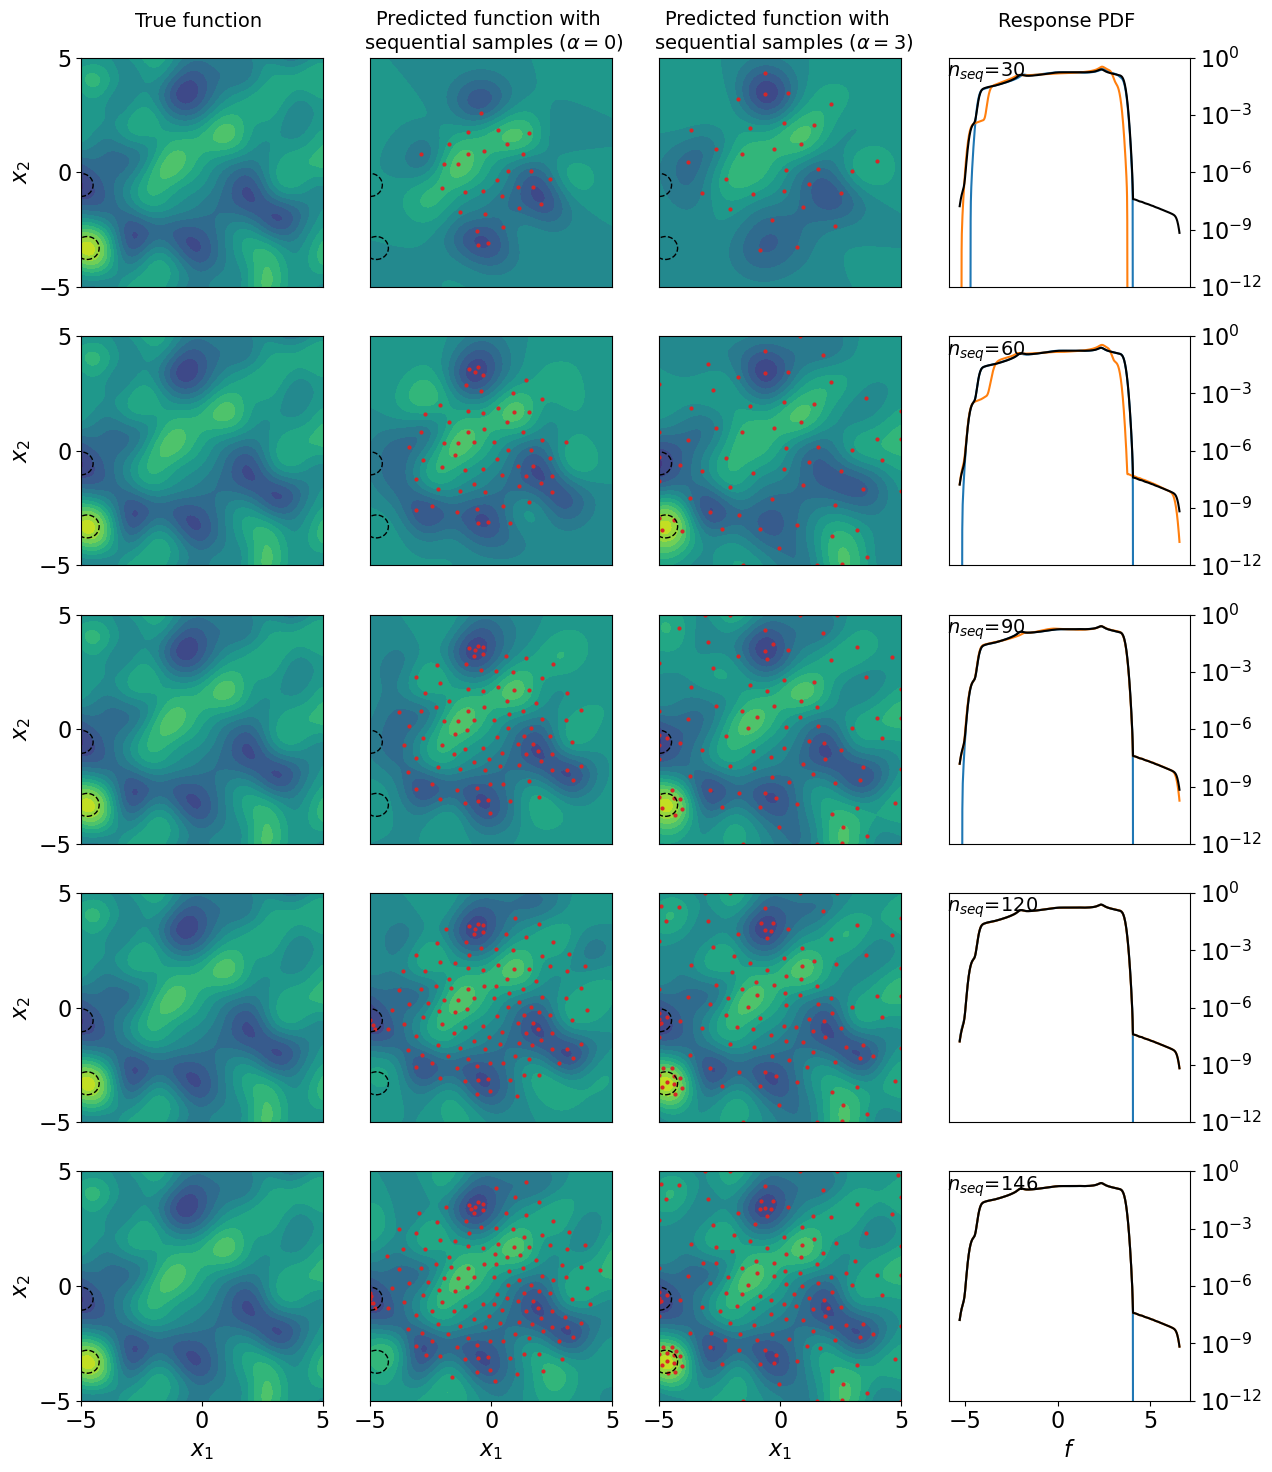

In [7]:
plot_2d([res, res], f_true_list, inputs, 0.1, 201, 
                       31, [0, 3], 13, 4, [30, 60, 90, 120, 146], 
                       sgp, None)